Data courtesy of: Pappalardo, Luca; Massucco, Emanuele (2019). Events. figshare. Dataset. https://doi.org/10.6084/m9.figshare.7770599.v1

In [3]:
import pandas as pd 
import numpy as np

In [4]:
prem = pd.read_json('/Users/rohanpatel/Desktop/Sports Analytics/Soccer Analytics/Free Kick Analysis/Data/Event Data/events_England.json')
laliga = pd.read_json('/Users/rohanpatel/Desktop/Sports Analytics/Soccer Analytics/Free Kick Analysis/Data/Event Data/events_Spain.json')
seriea = pd.read_json('/Users/rohanpatel/Desktop/Sports Analytics/Soccer Analytics/Free Kick Analysis/Data/Event Data/events_Italy.json')
bundesliga = pd.read_json('/Users/rohanpatel/Desktop/Sports Analytics/Soccer Analytics/Free Kick Analysis/Data/Event Data/events_Germany.json')
ligueone = pd.read_json('/Users/rohanpatel/Desktop/Sports Analytics/Soccer Analytics/Free Kick Analysis/Data/Event Data/events_France.json')
euros = pd.read_json('/Users/rohanpatel/Desktop/Sports Analytics/Soccer Analytics/Free Kick Analysis/Data/Event Data/events_European_Championship.json')
worldcup = pd.read_json('/Users/rohanpatel/Desktop/Sports Analytics/Soccer Analytics/Free Kick Analysis/Data/Event Data/events_World_Cup.json')

In [5]:
df = pd.concat([prem, laliga, seriea, bundesliga, ligueone, euros, worldcup])

In [6]:
df.columns

Index(['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id'],
      dtype='object')

In [7]:
print(df['subEventName'].unique())

['Simple pass' 'High pass' 'Head pass' 'Air duel' 'Ground loose ball duel'
 'Smart pass' 'Launch' 'Ground defending duel' 'Ground attacking duel'
 'Foul' 'Free Kick' 'Cross' 'Shot' 'Reflexes' 'Touch' 'Clearance'
 'Ball out of the field' 'Throw in' 'Goal kick' 'Corner'
 'Goalkeeper leaving line' 'Hand pass' 'Acceleration' 'Save attempt' ''
 'Free kick cross' 'Free kick shot' 'Hand foul' 'Violent Foul' 'Protest'
 'Whistle' 'Late card foul' 'Out of game foul' 'Penalty' 'Time lost foul'
 'Simulation']


In [8]:
vals = ['Free Kick', 'Free kick cross', 'Free kick shot']

df = df[df['subEventName'].isin(vals)]

In [9]:
df['subEventName'].unique()

array(['Free Kick', 'Free kick cross', 'Free kick shot'], dtype=object)

In [10]:
df['tags']

36                                  [{'id': 1801}]
69                                  [{'id': 1801}]
205                                 [{'id': 1801}]
268                                 [{'id': 1801}]
286                                 [{'id': 1801}]
                            ...                   
101567                 [{'id': 801}, {'id': 1802}]
101613                              [{'id': 1801}]
101675                              [{'id': 1802}]
101687                              [{'id': 1802}]
101715    [{'id': 302}, {'id': 801}, {'id': 1801}]
Name: tags, Length: 56422, dtype: object

In [11]:
def extract_id(row):
    if row and isinstance(row[0], dict):
        return row[0].get('id')
    return None

df['resultId'] = df['tags'].apply(extract_id)

In [12]:
df = df.drop(['tags'], axis = 1)

In [13]:
df['positions'].head()

36     [{'y': 44, 'x': 65}, {'y': 31, 'x': 65}]
69     [{'y': 31, 'x': 39}, {'y': 61, 'x': 50}]
205    [{'y': 13, 'x': 66}, {'y': 13, 'x': 71}]
268    [{'y': 51, 'x': 17}, {'y': 16, 'x': 58}]
286     [{'y': 60, 'x': 8}, {'y': 17, 'x': 22}]
Name: positions, dtype: object

In [14]:
df = df.reset_index()

In [15]:
df['index'] = df.index

In [16]:
df['startX'] = 0
df['startY'] = 0
df['endX'] = 0
df['endY'] = 0


In [17]:
for i in range(len(df)):
    df['startX'][i] = df['positions'][i][0]['x']
    df['startY'][i] = df['positions'][i][0]['y']
    df['endX'][i] = df['positions'][i][1]['x']
    df['endY'][i] = df['positions'][i][1]['y']

/var/folders/c0/f1qyzqw120gf28k2qshz4xd40000gn/T/ipykernel_412/3102198763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['startX'][i] = df['positions'][i][0]['x']
/var/folders/c0/f1qyzqw120gf28k2qshz4xd40000gn/T/ipykernel_412/3102198763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['startY'][i] = df['positions'][i][0]['y']
/var/folders/c0/f1qyzqw120gf28k2qshz4xd40000gn/T/ipykernel_412/3102198763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [18]:
df.head()

,index,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,resultId,startX,startY,endX,endY
0,0,3,Free Kick,0,"[{'y': 44, 'x': 65}, {'y': 31, 'x': 65}]",2499719,Free Kick,1609,1H,74.737141,31,177959198,1801,65,44,65,31
1,1,3,Free Kick,49876,"[{'y': 31, 'x': 39}, {'y': 61, 'x': 50}]",2499719,Free Kick,1609,1H,214.312946,31,177959230,1801,39,31,50,61
2,2,3,Free Kick,8013,"[{'y': 13, 'x': 66}, {'y': 13, 'x': 71}]",2499719,Free Kick,1631,1H,733.801542,31,177959403,1801,66,13,71,13
3,3,3,Free Kick,8480,"[{'y': 51, 'x': 17}, {'y': 16, 'x': 58}]",2499719,Free Kick,1631,1H,869.685150,31,177959469,1801,17,51,58,16
4,4,3,Free Kick,7882,"[{'y': 60, 'x': 8}, {'y': 17, 'x': 22}]",2499719,Free Kick,1609,1H,930.577543,31,177959466,1801,8,60,22,17


In [19]:
tags = pd.read_csv("/Users/rohanpatel/Desktop/Sports Analytics/Soccer Analytics/Free Kick Analysis/Data/Event Data/tags2name.csv")

In [20]:
tags.head()

,Tag,Label,Description
0,101,Goal,Goal
1,102,own_goal,Own goal
2,301,assist,Assist
3,302,keyPass,Key pass
4,1901,counter_attack,Counter attack


In [21]:
df = pd.merge(df, tags, how = "left", left_on = "resultId",
              right_on= "Tag")

In [22]:
df.head()

,index,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,resultId,startX,startY,endX,endY,Tag,Label,Description
0,0,3,Free Kick,0,"[{'y': 44, 'x': 65}, {'y': 31, 'x': 65}]",2499719,Free Kick,1609,1H,74.737141,31,177959198,1801,65,44,65,31,1801,accurate,Accurate
1,1,3,Free Kick,49876,"[{'y': 31, 'x': 39}, {'y': 61, 'x': 50}]",2499719,Free Kick,1609,1H,214.312946,31,177959230,1801,39,31,50,61,1801,accurate,Accurate
2,2,3,Free Kick,8013,"[{'y': 13, 'x': 66}, {'y': 13, 'x': 71}]",2499719,Free Kick,1631,1H,733.801542,31,177959403,1801,66,13,71,13,1801,accurate,Accurate
3,3,3,Free Kick,8480,"[{'y': 51, 'x': 17}, {'y': 16, 'x': 58}]",2499719,Free Kick,1631,1H,869.685150,31,177959469,1801,17,51,58,16,1801,accurate,Accurate
4,4,3,Free Kick,7882,"[{'y': 60, 'x': 8}, {'y': 17, 'x': 22}]",2499719,Free Kick,1609,1H,930.577543,31,177959466,1801,8,60,22,17,1801,accurate,Accurate


In [23]:
df['Is_Goal'] = 0

for i in range(len(df)):
    if (df['Tag'][i] == 101):
        df['Is_Goal'][i] = 1
    else:
        df['Is_Goal'][i] = 0

/var/folders/c0/f1qyzqw120gf28k2qshz4xd40000gn/T/ipykernel_412/382473446.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Goal'][i] = 0
/var/folders/c0/f1qyzqw120gf28k2qshz4xd40000gn/T/ipykernel_412/382473446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Goal'][i] = 1


In [24]:
df[df['Is_Goal'] == 1].head()

,index,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,...,id,resultId,startX,startY,endX,endY,Tag,Label,Description,Is_Goal
470,470,3,Free kick shot,8032,"[{'y': 68, 'x': 76}, {'y': 100, 'x': 100}]",2499737,Free Kick,1610,1H,1409.523322,...,180426396,101,76,68,100,100,101,Goal,Goal,1
1357,1357,3,Free kick shot,3802,"[{'y': 49, 'x': 72}, {'y': 100, 'x': 100}]",2499773,Free Kick,1612,1H,1350.380318,...,190078605,101,72,49,100,100,101,Goal,Goal,1
1817,1817,3,Free kick shot,261,"[{'y': 61, 'x': 75}, {'y': 100, 'x': 100}]",2499792,Free Kick,1627,2H,1036.655261,...,197097272,101,75,61,100,100,101,Goal,Goal,1
3299,3299,3,Free kick shot,7939,"[{'y': 44, 'x': 76}, {'y': 100, 'x': 100}]",2499853,Free Kick,1611,1H,1468.121782,...,210187388,101,76,44,100,100,101,Goal,Goal,1
3399,3399,3,Free kick shot,38021,"[{'y': 13, 'x': 88}, {'y': 0, 'x': 0}]",2499857,Free Kick,1625,2H,76.586888,...,210514898,101,88,13,0,0,101,Goal,Goal,1


In [25]:
df['Is_Goal'].value_counts()

0    56285
1      137
Name: Is_Goal, dtype: int64

In [26]:
# Normalize the Distances

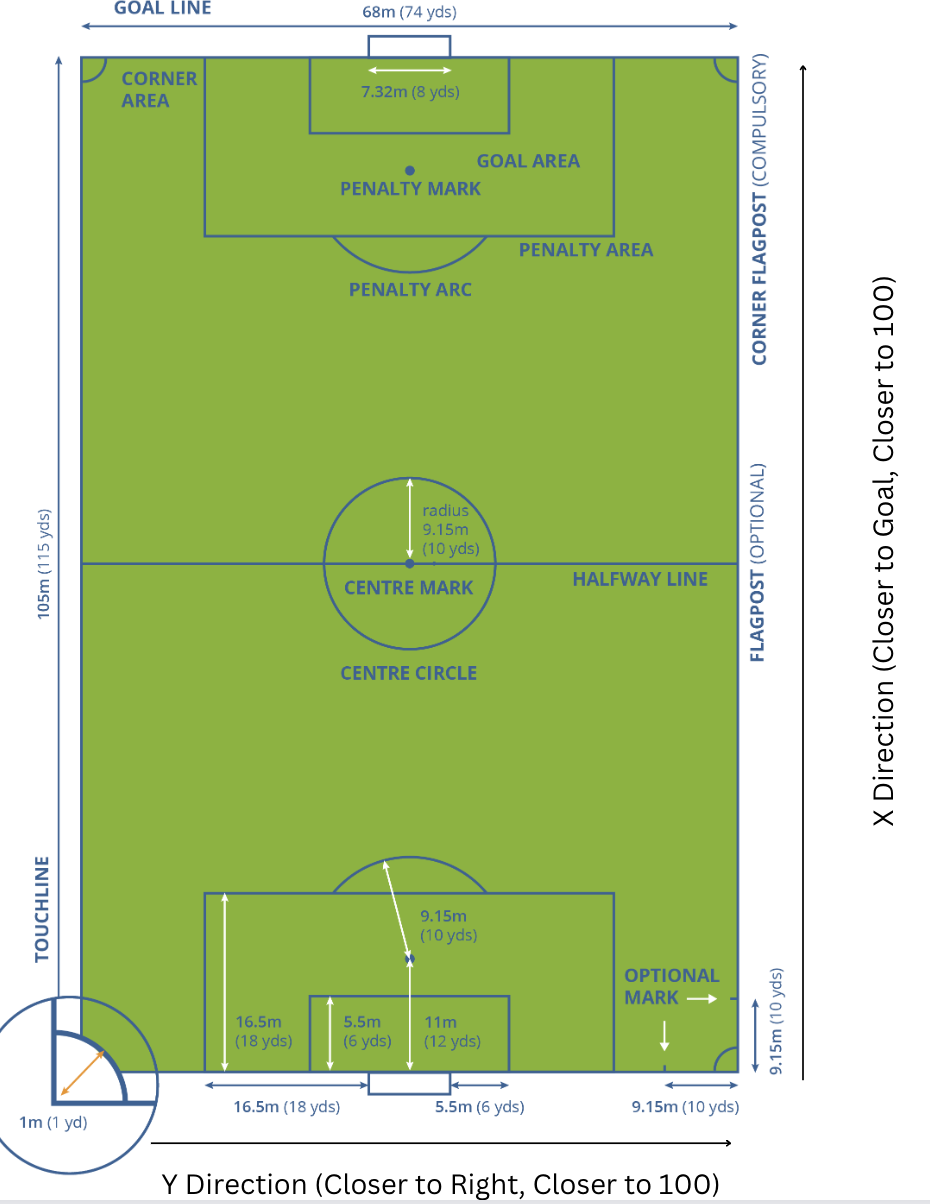

In [27]:
from IPython.display import Image, display

display(Image(filename='/Users/rohanpatel/Desktop/Sports Analytics/Soccer Analytics/Free Kick Analysis/Images/PitchVisual.png',
              width = 500,
              height = 1000))

In [28]:
df['distGoalX'] = 105 - (105 * (df['startX']/100))

In [31]:
df['adjustedY'] = 0

In [32]:
for i in range(len(df)):
    if (df['startY'][i] >= 50):
        df['adjustedY'][i] = df['startY'][i] - 50
    else:
        df['adjustedY'][i] = df['startY'][i]

/var/folders/c0/f1qyzqw120gf28k2qshz4xd40000gn/T/ipykernel_412/59667328.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adjustedY'][i] = df['startY'][i]
/var/folders/c0/f1qyzqw120gf28k2qshz4xd40000gn/T/ipykernel_412/59667328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adjustedY'][i] = df['startY'][i] - 50


<Axes: xlabel='adjustedY', ylabel='Count'>

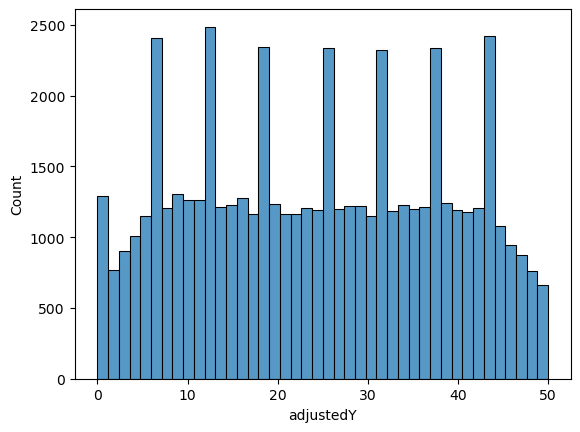

In [33]:
import seaborn as sns
sns.histplot(df['adjustedY'])

In [35]:
df['distGoalY'] = 0

In [36]:
for i in range(len(df)):
    if (df['startY'][i] < 50):
        df['distGoalY'][i] = -1 * (34 - (68 * (df['adjustedY'][i] / 100))) # Negative indicates left
    else:
        df['distGoalY'][i] = ((68 * (df['adjustedY'][i] / 100)))

/var/folders/c0/f1qyzqw120gf28k2qshz4xd40000gn/T/ipykernel_412/1708278016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distGoalY'][i] = -1 * (34 - (68 * (df['adjustedY'][i] / 100))) # Negative indicates left


<Axes: xlabel='distGoalX', ylabel='Count'>

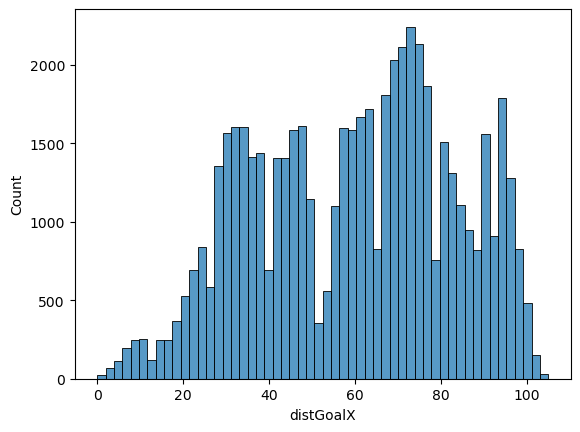

In [37]:
sns.histplot(df['distGoalX'])

<Axes: xlabel='distGoalY', ylabel='Count'>

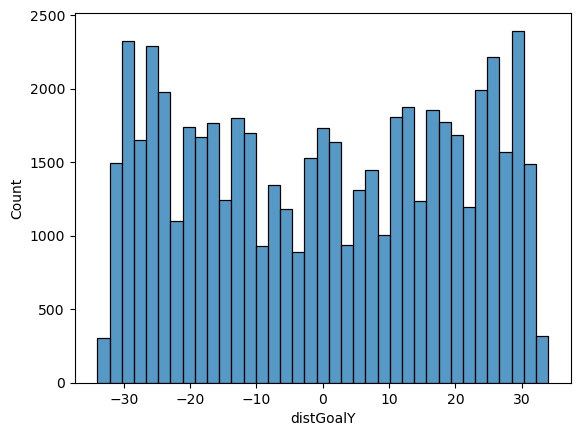

In [38]:
sns.histplot(df['distGoalY'])

In [39]:
players = pd.read_json("Data/Event Data/players.json")

In [40]:
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


In [41]:
df = pd.merge(df, players, left_on = 'playerId', right_on = 'wyId')

In [42]:
df['isLeftFooted'] = 0

for i in range(len(df)):
    if (df['foot'][i] == 'left'):
        df['isLeftFooted'][i] = 1

/var/folders/c0/f1qyzqw120gf28k2qshz4xd40000gn/T/ipykernel_412/3842722721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isLeftFooted'][i] = 1


In [43]:
df.to_csv("manipulatedEventData.csv")